In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

## Supervised learning
Modellizzare la relazione tra alcuni campi dei dati (features) e il valore di una etichetta (label) associata ai dati.
L'etichetta può essere:
* a valori discreti (classification)
* a valori continui (regression)

**Esempi:** Support Vector Machines (SVM), Linear Regression, Decision Trees, Neural Networks, K-nearest neighbor (K-NN)

Sistema che produce un output $y$ (label) in corrispondenza di $d$ inputs $x$ (features) secondo una relazione $f$ sconosciuta $y = f(x)$

Dataset di $P$ coppie (features, label) chiamato training set.

Supervised learning costruisce modello $m$ che approssima $f$ calibrando i parametri di $m$ sulla base del training set (fase di training).

Dopo il training, il modello $m$ viene utilizzato per la predizione di label in corrispondenza dei nuovi input (per cui non si conosce il label).

#### Classification: Predicting discrete data

Given a set of labeled points, use these to classify some unlabeled points.

##### Esempio: SVM per classificazione binaria

In 2 dimensioni (classificazione binaria), il discriminatore ha equazione:
$w_1x_1 + w_2x_2 + b = 0$

In [3]:
m1 = [5,2]
cov1 = [[1,0.5],[0.5,5]]
X1 = np.random.multivariate_normal(m1, cov1, 20)
y1 = np.zeros(20)

In [4]:
m2 = [1,8]
cov2 = [[1,0.1],[0.1,3]]
X2 = np.random.multivariate_normal(m2, cov2, 20)
y2 = np.ones(20)

In [5]:
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

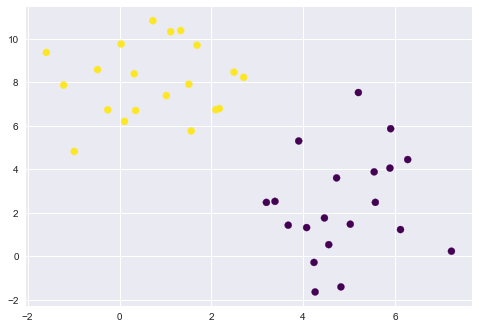

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()

In [7]:
from sklearn.svm import SVC
# linear = discriminatore lineare
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
model.coef_

array([[-0.76957044,  0.44885767]])

In [9]:
model.intercept_

array([-0.37519469])

In [10]:
# coefficients w0, w1
w = np.array([model.coef_[0][0], model.coef_[0][1]])
w

array([-0.76957044,  0.44885767])

In [11]:
# intercept b
b = model.intercept_[0]
b

-0.3751946885622702

In [12]:
# creazione discriminatore: retta x2 = (w1 * x1 + b)/(-w2)
xd1 = np.linspace(-1, 9, 10)
xd2 = (w[0] * xd1 + b)/(-w[1])

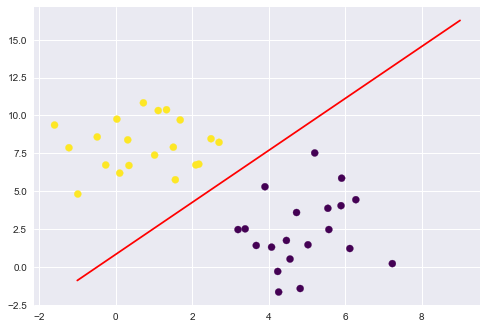

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.plot(xd1, xd2, 'r')
plt.show()

##### Esempio: K-NeighborsClassifier (K-NN) on load_iris dataset

In [14]:
from sklearn.datasets import load_iris
import pandas as pd

In [15]:
iris = load_iris()
X = iris.data
y = iris.target

In [16]:
X.shape

(150, 4)

In [17]:
y.shape

(150,)

In [18]:
# dataset exploration
df = pd.DataFrame(X,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
df['type'] = y

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
df.loc[df['type'] == 0, 'type'] = str(iris.target_names[0])
df.loc[df['type'] == 1, 'type'] = str(iris.target_names[1])
df.loc[df['type'] == 2, 'type'] = str(iris.target_names[2])

In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


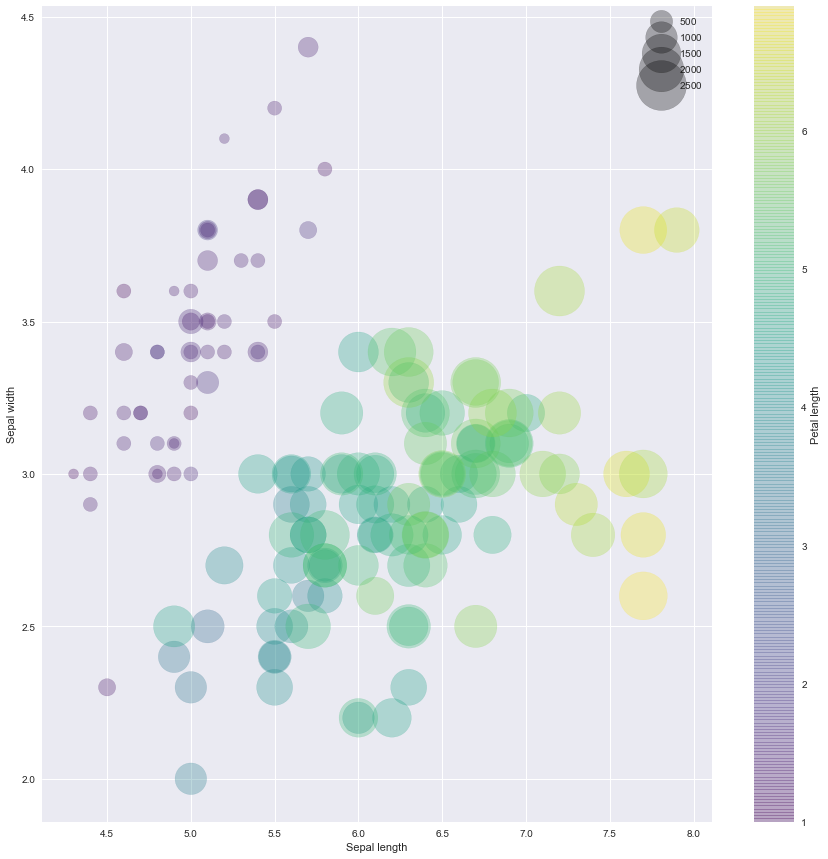

In [23]:
# dataset plotting
plt.figure(figsize=(15,15))
sc = plt.scatter(X[:,0], X[:,1], c=X[:,2], s=(X[:,3]*1000),cmap='viridis', alpha=0.3)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.colorbar().set_label('Petal length')
plt.legend(*sc.legend_elements('sizes', num=5))
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# search best parameters for K-NN
param_grid = {'n_neighbors':np.arange(1,15)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=7)
grid.fit(X,y)
grid.best_params_

{'n_neighbors': 11}

In [25]:
# train-test set splitting
model = KNeighborsClassifier(n_neighbors=11)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=0, train_size=0.6)

In [26]:
# training on training set
model.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [27]:
# predict on test set
ytest_fit = model.predict(Xtest)

In [28]:
# accuracy of prediction
# (predict flower type from data's features)
accuracy_score(ytest, ytest_fit)

0.9666666666666667

#### Regression: Predicting continuous labels
Labels now are continous quantities.

##### Esempio: Regressione lineare per ricostruire y=2x-5 + rumore

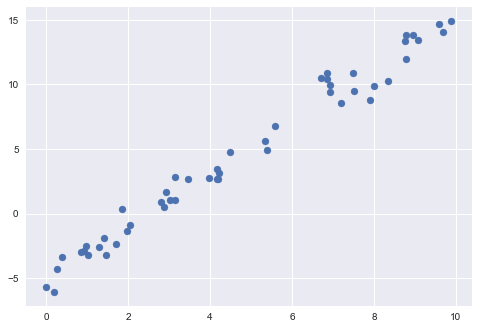

In [29]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) # 50 elementi [0,10]
y = 2 * x - 5 + rng.randn(50) # retta y=2x-5 + rumore sui 50 punti
plt.scatter(x, y)
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# search best parameters for LinearRegression
param_grid = {'fit_intercept':[True, False]}

grid = GridSearchCV(LinearRegression(), param_grid, cv=7)
grid.fit(x[:, np.newaxis],y)
grid.best_params_

{'fit_intercept': True}

In [32]:
# retta non passa per origine
model = LinearRegression(fit_intercept=True)
# X deve essere bidimensionale
model.fit(x[:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
xfit = np.linspace(0,10,1000) # nuovo dataset
yfit = model.predict(xfit[:, np.newaxis])

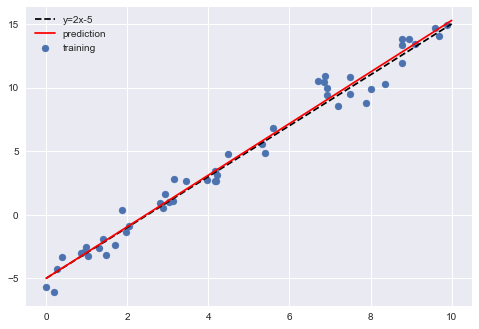

In [34]:
plt.scatter(x, y, label='training')
yreal = 2*xfit-5;
plt.plot(xfit, yreal[:, np.newaxis], color='black', linestyle='--', label='y=2x-5')
plt.plot(xfit, yfit, color='red', label='prediction')
plt.legend()
plt.show()

In [35]:
# originale: y = 2x - 5 + rumore
print("original: y = 2x - 5 + rumore")
# pendenza retta (vicino a 2)
print("slope: ", model.coef_[0])
# intercetta retta (vicino a -5)
print("intercept: ", model.intercept_)

original: y = 2x - 5 + rumore
slope:  2.0272088103606953
intercept:  -4.998577085553204


##### Esempio: Regressione non lineare per ricostruire y=sin(x) + rumore

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [37]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50) # sin(x) + rumore

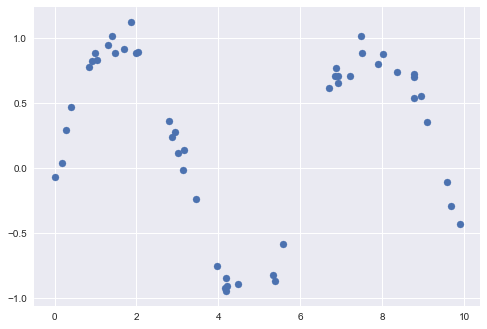

In [38]:
plt.scatter(x, y)
plt.show()

In [39]:
x=x[:, np.newaxis]
x.shape

(50, 1)

In [40]:
# search best parameters for PolynomialRegression
param_grid = {'polynomialfeatures__degree': np.arange(1,15) ,
              'linearregression__fit_intercept':[True, False]}

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(x,y)
grid.best_params_

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 10}

In [41]:
poly_obj = PolynomialFeatures(degree=10) # polinomio di grado 10

In [42]:
# applica trasformazione a features iniziali
x_poly = poly_obj.fit_transform(x)

In [43]:
x_poly.shape

(50, 11)

In [44]:
# modello regressione lineare
model = LinearRegression(fit_intercept=True)

In [45]:
# addestramento modello su features di dim 10
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
xfit = np.linspace(0,10,100)
# previsione dati su nuovi dati ma prima bisogna trasformarli
yfit = model.predict(poly_obj.fit_transform(xfit[:, np.newaxis]))

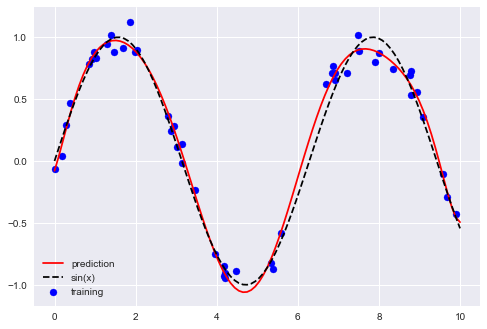

In [47]:
plt.scatter(x,y,c='b', label='training')
plt.plot(xfit, yfit, 'r', label='prediction')
plt.plot(xfit, np.sin(xfit), 'black', label='sin(x)', linestyle='--')
plt.legend()
plt.show()

## Unsupervised learning
Creare modelli dei dati sulla base di features ma senza etichette.

**Esempi:** K-Means (clustering), Principal Component Analysis (PCA)

#### Clustering: Inferring labels on unlabeled data
Data is automatically assigned to some number of discrete groups.

A partire dalle proprietà (geometriche) di dati non etichettati, si ricostruisce la loro appartenenza a clusters (gruppi) omogenei (obiettivo: etichettarli).

##### Esempio: K-Means on 4 clusters of points

Algoritmo K-Means raggruppa i campioni in un numero predeterminato ($k$) di clusters seguendo 2 principi:
* il **centro** di un cluster è la media aritmetica dei campioni che appartengono al cluster (baricentro).
* ogni campione è associato al cluster con il centro più vicino.

L'algoritmo procede con alternanza di fase di aggiustamento dei centri e assegnamento dei campioni al centro più vicino.

In [48]:
from sklearn.cluster import KMeans

In [49]:
m1 = [5,1]
cov1 = [[1,0.5], [0.5,5]]
m2 = [1,6]
cov2 = [[1,0.1], [0.1,3]]
m3 = [12,-1]
cov3 = [[1,0.5], [0.5,5]]
m4 = [9,8]
cov4 = [[1,0.1], [0.1,3]]

X1 = np.random.multivariate_normal(m1, cov1, 20)
X2 = np.random.multivariate_normal(m2, cov2, 20)
X3 = np.random.multivariate_normal(m3, cov3, 20)
X4 = np.random.multivariate_normal(m4, cov4, 20)

X = np.concatenate((X1, X2, X3, X4))

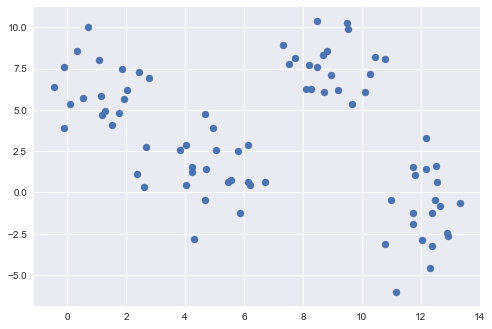

In [50]:
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.show()

In [51]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
# predictions: array di etichette predette dai dati stessi
y_predict = model.predict(X)

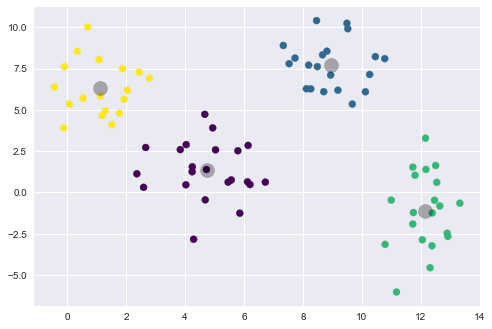

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50, cmap='viridis')
centri = model.cluster_centers_
plt.scatter(centri[:, 0], centri[:, 1], c='black', s=200, alpha=0.3)
plt.show()

#### Dimensionality reduction: Inferring structure of unlabeled data
Labels or other information are inferred from the structure of the dataset itself.

Cerca di tirare fuori una rappresentazione basso-dimensionale dei dati che in qualche modo preserva le qualità rilevanti in differenti modi. (preserva la qualità dei dati anche se riduce le dimensioni (numero di features))

In [54]:
from sklearn.datasets import load_digits

In [55]:
# cifre da 0 a 5
digits = load_digits(n_class=6)

In [56]:
digits.data.shape

(1083, 64)

In [57]:
digits.images.shape

(1083, 8, 8)

In [58]:
digits.target.max()

5

In [59]:
digits.target.min()

0

In [60]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

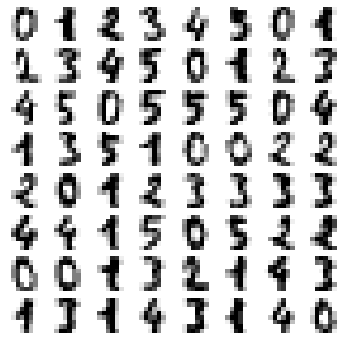

In [61]:
# plottiamo le prime 64 righe di digits.images
fig, ax = plt.subplots(8,8, figsize=(6,6))
for i,ax_i in enumerate(ax.flat):
    ax_i.set_axis_off()
    ax_i.imshow(digits.images[i], cmap='binary')

In [62]:
# usiamo una delle tecniche di dimensionality reduction
from sklearn.manifold import Isomap

In [63]:
# riduzione da 64 features a 2 (plottabili)
iso = Isomap(n_components=2)

In [64]:
proj = iso.fit_transform(digits.data)

In [65]:
digits.data.shape

(1083, 64)

In [66]:
proj.shape

(1083, 2)

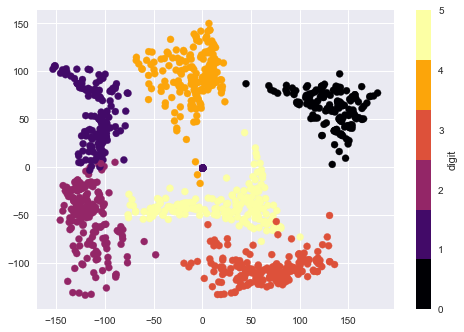

In [67]:
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap=plt.cm.get_cmap('inferno', 6))
plt.colorbar(ticks=range(6), label='digit')
plt.show()

In [68]:
# try predicting on feature-reduced data
Xtrain, Xtest, ytrain, ytest = train_test_split(proj,digits.target, random_state=0, train_size=0.5)

In [69]:
from sklearn.neural_network import MLPClassifier

In [70]:
# search best parameters for MLPClassifier
param_grid = {'hidden_layer_sizes':np.arange(1,60)}

grid = GridSearchCV(MLPClassifier(), param_grid, cv=7)
grid.fit(Xtrain,ytrain)
grid.best_params_

{'hidden_layer_sizes': 52}

In [71]:
ytest_fit = grid.best_estimator_.predict(Xtest)

In [72]:
accuracy_score(ytest, ytest_fit)

0.9243542435424354